In [0]:
import tensorflow as tf
from tensorflow.python import keras
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import plot_model

from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
import matplotlib.pyplot as plt

'\nfrom tensorflow.keras.layers.normalization import BatchNormalization\nimport numpy as np\nfrom keras.utils import np_utils\nfrom keras.optimizers import Adam\nfrom keras.preprocessing.image import ImageDataGenerator\nfrom keras.models import Sequential\nfrom keras.layers.convolutional import Conv2D, MaxPooling2D\nfrom keras.layers.core import Activation, Flatten, Dense\nfrom keras.utils.vis_utils import plot_model\n\nfrom keras.layers import Dropout\nfrom keras import backend as K\nfrom keras.models import load_model\nfrom keras.datasets import mnist\nfrom keras.utils import np_utils\nimport matplotlib.pyplot as plt\n'

In [0]:
import numpy 

#fix random seed for reproducibility
seed= 1234
numpy.random.seed(seed)

# load minit data
(X_train, y_train),(X_test, y_test) = mnist.load_data()

#printng shape of mnist train and test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


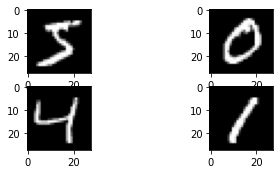

In [0]:
# plot four images as gray scale
plt.subplot(321)
plt.imshow(X_train[0],cmap='gray')
plt.subplot(322)
plt.imshow(X_train[1],cmap='gray')
plt.subplot(323)
plt.imshow(X_train[2],cmap='gray')
plt.subplot(324)
plt.imshow(X_train[3],cmap='gray')

In [0]:
'''
CNN accepts a specific format when using tensorflow e.g.(batch, height, width, channels)
As all the images are in grayscale, the number of channels is 1
'''
# reshape the data to four dimensions, due to the input of model
# reshape to be [samples/batch][width][height][pixels/channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

'''
rescaled the image data below so that each pixel lies in the interval [0, 1] instead of [0, 255].
'''
# Normalization
#X_train /= 255.0
#X_test /= 255.0
#print(X_train[0])


'\nrescaled the image data below so that each pixel lies in the interval [0, 1] instead of [0, 255].\n'

In [0]:
'''
encode the labels i.e. Y_train and Y_test. 
In one-hot encoding an integer is converted to an array which contains only 
one ‘1’ and the rest elements are ‘0’.
'''
# one-hot
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [0]:

# parameters
# num_classes = y_test.shape[1]
# input_img = Input(shape=(224,224,3))

# create model
model = Sequential()

# first block of conv2D, 64 filters, size of filters (3,3)
model.add(Conv2D(64,(3,3), padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D((2,2),padding='same'))

# second block of conv2D
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D((2,2),padding= 'same'))

# third block of conv2D
model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D((2,2),padding='same'))

# fouth block of conv2D
model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D((2,2),padding='same'))

# fifth block of conv2D
model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D((2,2),padding='same'))

# Dense layer
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 7, 7, 256)        

In [0]:
from tensorflow.keras import optimizers

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#plot_model(model, to_file='vgg_model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size = 255) # verbose=2

Epoch 1/5
236/236 [==============================] - 14s 61ms/step - loss: 1.3141 - accuracy: 0.5489 - val_loss: 0.0825 - val_accuracy: 0.9744
Epoch 2/5
236/236 [==============================] - 14s 60ms/step - loss: 0.0753 - accuracy: 0.9775 - val_loss: 0.0363 - val_accuracy: 0.9896
Epoch 3/5
236/236 [==============================] - 14s 60ms/step - loss: 0.0415 - accuracy: 0.9878 - val_loss: 0.0446 - val_accuracy: 0.9866
Epoch 4/5
236/236 [==============================] - 14s 60ms/step - loss: 0.0283 - accuracy: 0.9915 - val_loss: 0.0302 - val_accuracy: 0.9903
Epoch 5/5
236/236 [==============================] - 14s 60ms/step - loss: 0.0206 - accuracy: 0.9937 - val_loss: 0.0265 - val_accuracy: 0.9915


**Evalution**

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)

In [0]:
print("Accuracy on test set: ",score[1])

Accuracy on test set:  0.9915000200271606


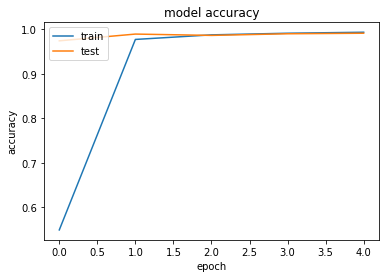

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

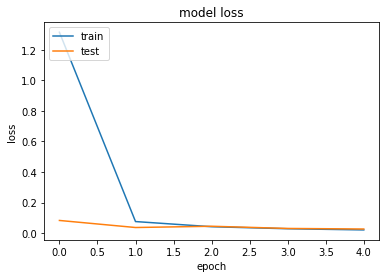

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model.save('VGGNet_Model.h5')

In [0]:
img_width, img_height = 28, 28

# load the model we saved
model = load_model('VGGNet_Model.h5')
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])